<a href="https://colab.research.google.com/github/kushalsen17/Projects/blob/main/Linear_Regression_Medical_Cost_and_BMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary Libraries Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# DATASET DESCRIPTION


**Id**  

Unique identifier for each individual entry.

**Age**
Age of the individual (in years).

**Sex**
Gender of the individual (male or female).

**Bmi**
Body Mass Index – a measure of body fat based on height and weight.

**Children**
Number of children/dependents covered by the insurance.

**Smoker**
Indicates whether the person is a smoker (yes or no).

**Region**
Geographic region in the US (southwest, southeast, northwest, northeast).

**Charges**
The medical insurance charges billed to the individual.


# Read Data

In [29]:
df = pd.read_csv('medical_cost.csv')  # This is To Read CSV file

In [30]:
df

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


## EDA - Summary of Data, Data Visualization

#Explore Data in Depth

In [31]:
df.shape  # Column and Row

(1338, 8)

In [32]:
df.dtypes  # Data Type of Each Column

,0
Id,int64
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [33]:
df.head()  # First 5 Reading

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [34]:
df.columns

Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1338.0,669.500000,386.391641,1.0000,335.25000,669.500,1003.750000,1338.00000
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#Visualization of Data

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >]], dtype=object)

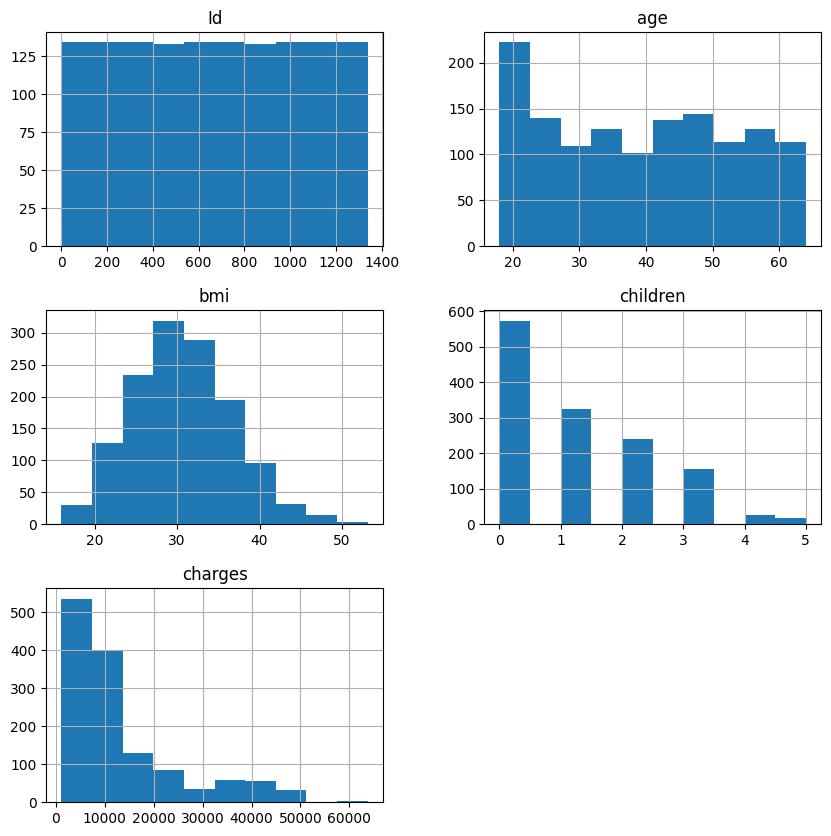

In [37]:
df.hist(figsize = (10,10))

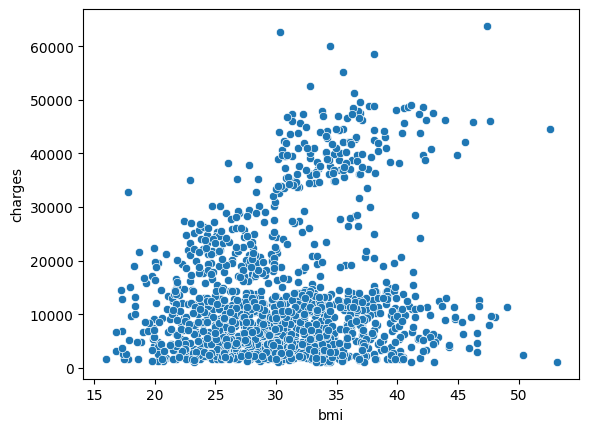

In [38]:
sn.scatterplot(x='bmi', y='charges',data=df)
plt.show()

In [39]:
# Drop the Rows with Charges < 12000
df = df[df['charges'] > 20000]

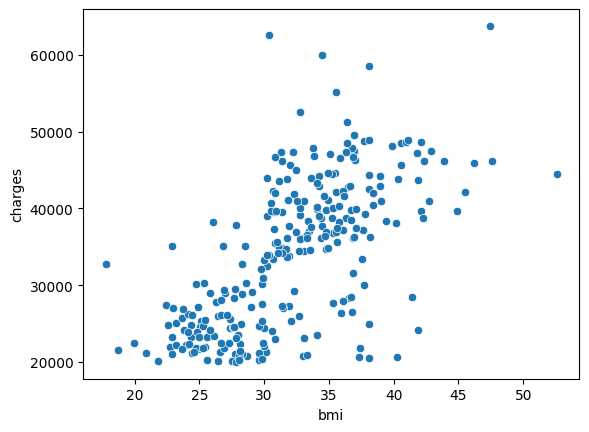

In [40]:
sn.scatterplot(x='bmi', y='charges',data=df)
plt.show()

In [41]:
df

,Id,age,sex,bmi,children,smoker,region,charges
3,4,33,male,22.705,0,no,northwest,21984.47061
9,10,60,female,25.840,0,no,northwest,28923.13692
11,12,62,female,26.290,0,yes,southeast,27808.72510
14,15,27,male,42.130,0,yes,southeast,39611.75770
19,20,30,male,35.300,0,yes,southwest,36837.46700
...,...,...,...,...,...,...,...,...
1313,1314,19,female,34.700,2,yes,southwest,36397.57600
1321,1322,62,male,26.695,0,yes,northeast,28101.33305
1323,1324,42,female,40.370,2,yes,southeast,43896.37630
1328,1329,23,female,24.225,2,no,northeast,22395.74424


In [42]:
x = df[['bmi']]
y = df['charges'] # dependent variable

In [43]:
x

,bmi
3,22.705
9,25.840
11,26.290
14,42.130
19,35.300
...,...
1313,34.700
1321,26.695
1323,40.370
1328,24.225


In [44]:
y

,charges
3,21984.47061
9,28923.13692
11,27808.72510
14,39611.75770
19,36837.46700
...,...
1313,36397.57600
1321,28101.33305
1323,43896.37630
1328,22395.74424


#Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 264 to 1037
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bmi     191 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 854 to 826
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bmi     82 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


# Select Model ML

In [49]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Training

In [50]:
lm.fit(X_train, y_train)  # Training

LinearRegression()

#Testing

In [51]:
predictions = lm.predict(X_test)  # Testing

# Model Evaluation

# Error Calcuation

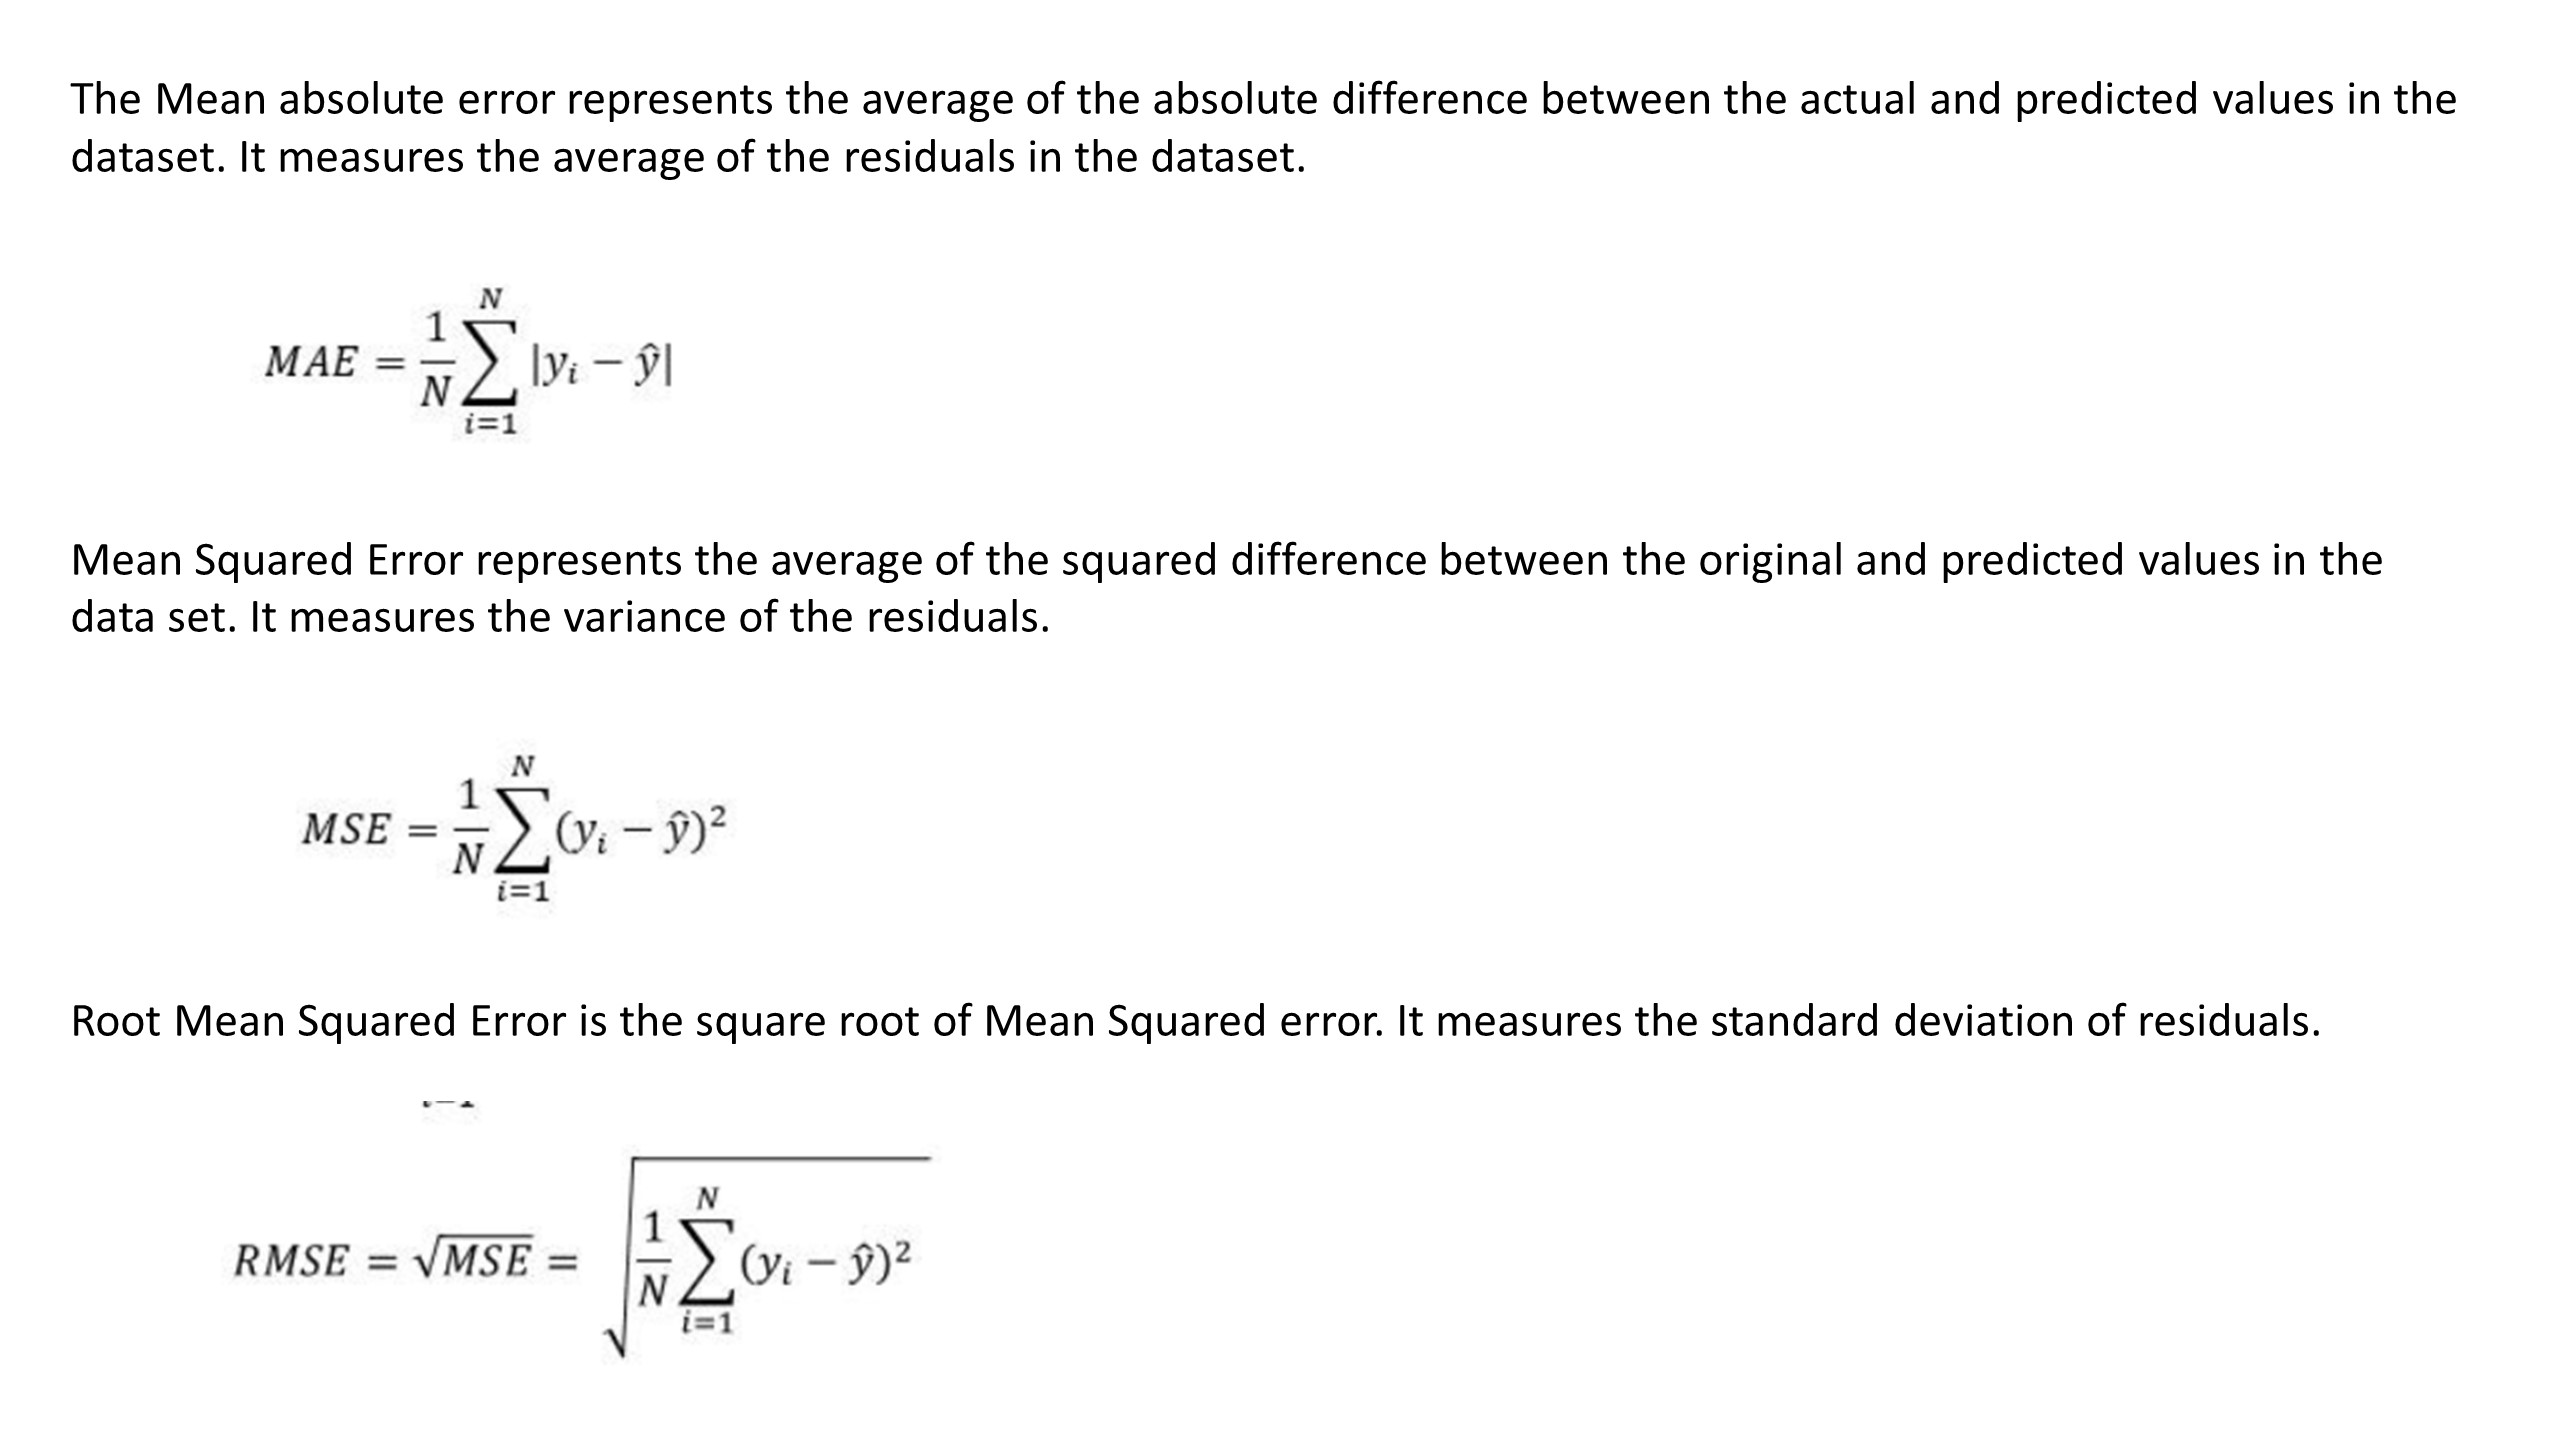

# Model Evaluation for the Testing Data

In [72]:
import numpy as np
import sklearn.metrics as metrics

print("Evaluation Metrics based on Testing Data")
print(f'MAE: {metrics.mean_absolute_error(y_test, predictions):.2f}')
print(f'MSE: {metrics.mean_squared_error(y_test, predictions):.2f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions)):.2f}')

Evaluation Metrics based on Testing Data
MAE: 5682.61
MSE: 52960077.80
RMSE: 7277.37


# Model Evaluation for the Training Data

In [73]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on the training set
predictions_train = lm.predict(X_train)

# Evaluation metrics for training data
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)

print("Evaluation Metrics on Training Data:")
print(f'MAE: {mae_train:.2f}')
print(f'MSE: {mse_train:.2f}')
print(f'RMSE: {rmse_train:.2f}')

Evaluation Metrics on Training Data:
MAE: 5536.07
MSE: 54785121.07
RMSE: 7401.70
